#### 라쏘 회귀

- penalty > 릿지에서는 L2-norm / 라쏘에서는 L1-norm
- L1-norm은 가중치가 0이 될 수 있음 > w


- L2-norm =  ∑w^2
- L1-norm = ∑|w|


- 반영되지 않는 특성이 생길 수 있음 = 특성을 선별적으로 사용
- 특성 일부가 중요하고 일부는 중요하지 않을때

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False 

In [4]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ !=0)))

print('')
print("계수값", lasso.coef_)
print(np.where(lasso.coef_!=0))

#

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4

계수값 [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.

In [6]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ !=0)))

# max_iter = lasso는 하강하는 방식의 학습법이라서
# alpha값을 줄이면 반복 횟수를 늘려야 한다고 함.

# 경사하강법의 학습률과 반복 횟수 같은 느낌인가?

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [7]:
lasso00001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ !=0)))

# 0.01에 비해서 훈련 점수는 올라가고 테스트 점수가 떨어짐..
# 일반화가 더 안됐음.

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))

#

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77
훈련 세트 점수: 0.90
테스트 세트 점수: 0.77


alpha = 1 :   4
alpha = 0.01 :   33
alpha = 0.001 :   96
Ridge :  104


Text(0, 0.5, '계수 크기')

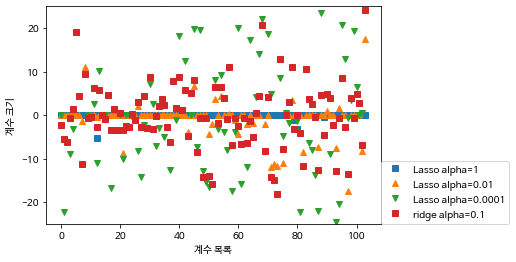

In [19]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge.coef_, 's', label="ridge alpha=0.1")

print('alpha = 1 :  ', np.sum(lasso.coef_!=0))
print('alpha = 0.01 :  ', np.sum(lasso001.coef_!=0))
print('alpha = 0.001 :  ', np.sum(lasso00001.coef_!=0))
print("Ridge : ", np.sum(ridge.coef_!=0))
plt.legend(loc=(1,0))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

alpha = 1 계수 대부분이 0
작아질수록 점점 0이 아닌 사용되는 계수가 늘어남

[[[0.2666855509248528, 0.20366147879522123], [0.2578061348516594, 0.14718947453569653], [0.24938119758799937, 0.22470999933149782], [0.20462864135154146, 0.13546370431413957], [0.0, -0.0025304636643577183]], [[0.6090049856206103, 0.7485729595582387], [0.6157302723353866, 0.6038229084590105], [0.6054674977023747, 0.6186065233248108], [0.6627558383099512, 0.5438821806168832], [0.49925188366221274, 0.5909942670882591]], [[0.6090053279061554, 0.7487720212722673], [0.6157306302240895, 0.6039396702206058], [0.6054678537534223, 0.618734379369854], [0.6627562963917937, 0.5439642494422234], [0.49925306948000603, 0.5913394002822083]]]
(5, 2)
(5,)


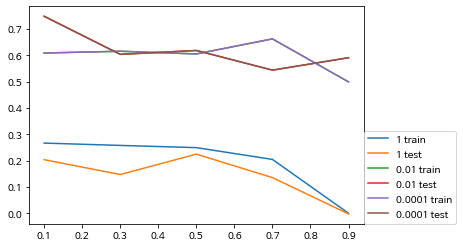

In [67]:
import mglearn

X, y = mglearn.datasets.make_wave(n_samples=100)

score = [[],[],[]]
sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
for size in sizes:
    #print("\nTest size = " , size);
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=size)   
    lasso = Lasso(alpha=1).fit(X_train, y_train)
    score[0].append([lasso.score(X_train, y_train), lasso.score(X_test,y_test)])
    lasso001 = Lasso(alpha=0.001).fit(X_train, y_train)
    score[1].append([lasso001.score(X_train, y_train), lasso001.score(X_test,y_test)])
    lasso00001 = Lasso(alpha=0.00001).fit(X_train, y_train)
    score[2].append([lasso00001.score(X_train, y_train), lasso00001.score(X_test,y_test)])

print(score)
score = np.array(score)
sizes = np.array(sizes)
print(score[0,:].shape)
print(sizes.shape)

plt.plot(sizes, score[0,:,0], label = "1 train")
plt.plot(sizes, score[0,:,1], label = "1 test")
plt.plot(sizes, score[1,:,0], label = "0.01 train")
plt.plot(sizes, score[1,:,1], label = "0.01 test")
plt.plot(sizes, score[2,:,0], label = "0.0001 train")
plt.plot(sizes, score[2,:,1], label = "0.0001 test")


plt.legend(loc=(1,0))